In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#sources:
#https://www.kaggle.com/headsortails/explorations-of-action-moa-eda
#https://www.kaggle.com/isaienkov/mechanisms-of-action-moa-prediction-eda

# Let's look at the data

In [3]:
df_train = pd.read_csv('lish-moa/train_features.csv')
df_test = pd.read_csv('lish-moa/test_features.csv')
df_ss = pd.read_csv('lish-moa/sample_submission.csv')
df_ts = pd.read_csv('lish-moa/train_targets_scored.csv')
df_tns = pd.read_csv('lish-moa/train_targets_nonscored.csv')

In [3]:
print("train shape: {}".format(df_train.shape))
print("train target scored shape: {}".format(df_ts.shape))
print("train target nonscored: {}".format(df_tns.shape))

print("test shape: {}".format(df_test.shape))
print("sample submission shape: {}".format(df_ss.shape))

train shape: (23814, 876)
train target scored shape: (23814, 207)
train target nonscored: (23814, 403)
test shape: (3982, 876)
sample submission shape: (3982, 207)



## Train data set
<ol>
  <span style="color:#000000; font-family: 'Georgia'; font-size: 1.2em;"> <li>  876 features(inluding id's) and 23814 samples </li>
   <li> Features: <br>
                 a. <b>'g-'</b> gene expression and <b>'c-'</b> cell viability <br>
                 b.  <b>cp_type: </b> samples treated with compound (cp_vehicle) and with control pertrubation (ctrl_vehicle) <br>    c.  <b>cp_dose</b> - amount of <b>dose</b>(high or low),<b> cp_time</b> - treatment duration (24, 48, 72 hours)  <br> 
                 d. <b>sig_id</b> - unique id of sample      
    
</ol>    
    </span>

In [5]:
df_train.head(2)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [10]:
df_train.iloc[:, 1:3]

,cp_type,cp_time
0,trt_cp,24
1,trt_cp,72
2,trt_cp,48
3,trt_cp,48
4,trt_cp,72
...,...,...
23809,trt_cp,24
23810,trt_cp,24
23811,ctl_vehicle,48
23812,trt_cp,24


## Scored Targets(training)
<ol>
   <span style="color:#000000; font-family: 'Georgia'; font-size: 1.2em;">  
   <li> 207 columns(inluding id's) and 23814 samples. So, we have 206 types of MoA's.  </li>
   <li> Features: <br>
                 a. <b>'sig_id'</b> unique id, by this id we can merge the table above and the current scored targets table <br>
                 b. 206 MoAs. Binary targets - 0 or 1. Each sample can have several MoA annotations. <b>Hence, we have multilable classification task.</b>  
</ol>
<b>So the goal will be predicting multiple targets of the Mechanism of Action (MoA) response(s) of different samples (sig_id), given various inputs such as gene expression data and cell viability data.</b> </span>

In [5]:
df_ts.head(2)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
trt_cp_num = df_train.cp_type.value_counts()['trt_cp']
ctl_vehicle_num = df_train.cp_type.value_counts()['ctl_vehicle']
d1_num = df_train.cp_dose.value_counts()['D1']
d2_num = df_train.cp_dose.value_counts()['D2']
first_num = df_train.cp_time.value_counts()[24]
second_num = df_train.cp_time.value_counts()[48]
third_num = df_train.cp_time.value_counts()[72]

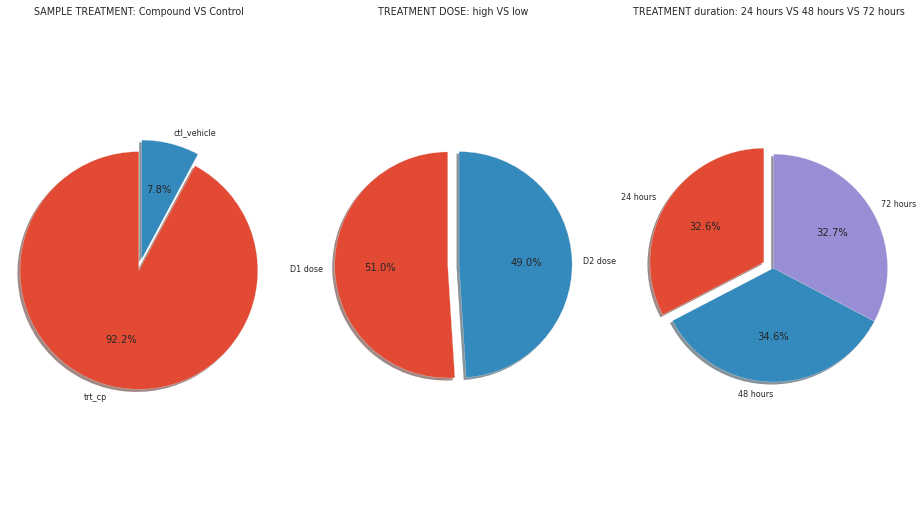

In [23]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (16,9))

sizes = [trt_cp_num, ctl_vehicle_num]
explode = (0.1, 0)
labels = 'trt_cp', 'ctl_vehicle'
ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal') 
ax[0].set_title('SAMPLE TREATMENT: Compound VS Control')
#----------------------------------------------------------------------------------------
sizes_dose = [d1_num, d2_num]
explode = (0.1, 0)
labels = 'D1 dose', 'D2 dose'
ax[1].pie(sizes_dose, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal') 
ax[1].set_title('TREATMENT DOSE: high VS low')
#--------------------------------------------------------------------------------------------
sizes_time = [first_num, second_num, third_num]
explode = (0.1, 0, 0)
labels = '24 hours', '48 hours', '72 hours'
ax[2].pie(sizes_time, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal') 
ax[2].set_title('TREATMENT duration: 24 hours VS 48 hours VS 72 hours')
plt.show()

### Conclusion from the pie charts
<ul>
    <span style="color:#000000; font-family: 'Georgia'; font-size: 1.1em;">
<li> <b>92.2 %</b> of samples has been treated with <b>compound(trt_cp)</b> and only <b>7.8 % with control pertrubation(ctl_vehicle)</b>. Note that samples with ctl_vehicle doesn't have MoA annotations. Hence, it might be useful to drop the rows with ctl_vehicle during the classification  </li>
<li> <b>High and Low doses</b> are evenly balanced</li>
<li><b>Treatment durations(24, 48, 72)</b> are also evenly balanced   
</ul>
<b>Lets look at these numbers without considering samples with ctl_vehicle.</b>
    </span>

In [8]:
d1_num = df_train[df_train.cp_type != 'ctl_vehicle'].cp_dose.value_counts()['D1']
d2_num = df_train[df_train.cp_type != 'ctl_vehicle'].cp_dose.value_counts()['D2']
overall = d1_num + d2_num
print('high dose {:.2f}% and low dose {:.2f}%'.format(100*d1_num/overall, 100*d2_num/overall))
first = df_train[df_train.cp_type != 'ctl_vehicle'].cp_time.value_counts()[24]
second = df_train[df_train.cp_type != 'ctl_vehicle'].cp_time.value_counts()[48]
third = df_train[df_train.cp_type != 'ctl_vehicle'].cp_time.value_counts()[72]
overall = first + second + third
print('duration: 24 hours: {:.2f} %, 48 hours {:.2f}%, 72 hours {:.2f}%'.format(100 *first/overall, 100 * second/overall, 100 * third/overall))

high dose 51.01% and low dose 48.99%
duration: 24 hours: 32.65 %, 48 hours 34.64%, 72 hours 32.71%


<b>As you can see, the types of doses and treatment durations are almost evenly balanced even after we discarded the samples with ctl_vehicle</b>

# Distributions of gene cells, cell viability features and target feature

## Gene cells distributions
<span style="color:#000000; font-family: 'Georgia'; font-size: 1.1em;">
In order to check for normality, we can check their skew value, as a general rule of thumb: <br>
<b>If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. <br>
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.</b><br>

<ul>    
 <b>So I found out that</b>   
<li>only 143 gene cells out of 772 is almost symmetric and 119 is moderately skewed<br>
majority of gene cells are highly skewed - 510 </li>       
<li> The majority of skews of gene cells features are between -2 and 2</li>    
<li>The means of gene cells features are distributed around 0 </li>
<li>The majority of std of gene cells features are between 1 and 1.5 </li>    
</ul>
</span>

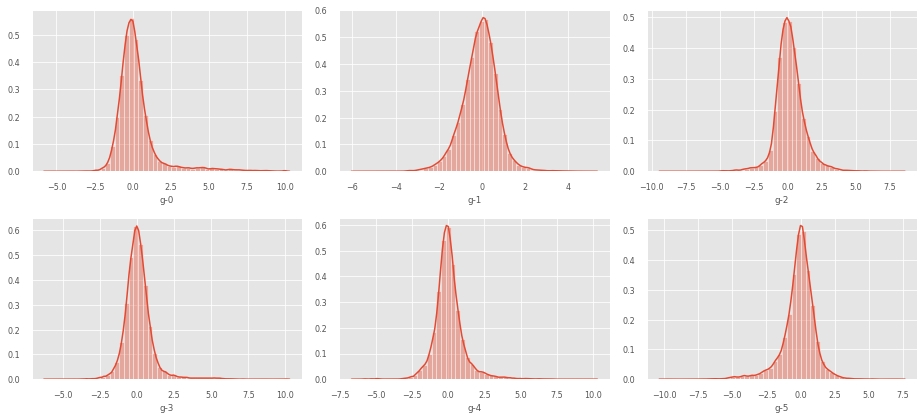

In [24]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (13,6))
sns.set(style="darkgrid")
sns.distplot(df_train['g-0'], ax = ax[0][0])
sns.distplot(df_train['g-1'], ax = ax[0][1])
sns.distplot(df_train['g-2'], ax = ax[0][2])
sns.distplot(df_train['g-3'], ax = ax[1][0])
sns.distplot(df_train['g-4'], ax = ax[1][1])
sns.distplot(df_train['g-5'], ax = ax[1][2])
plt.tight_layout()

In [10]:
num_symm = 0
num_moderate = 0
list_mean = []
list_skew = []
list_std = []
for i in range(0, 772):
    list_mean.append(df_train[f'g-{i}'].mean())
    list_std.append(df_train[f'g-{i}'].std())
    list_skew.append(df_train[f'g-{i}'].skew())

    if df_train[f'g-{i}'].skew() <= 0.5 and df_train[f'g-{i}'].skew() >= -0.5:
        num_symm += 1
    elif df_train[f'g-{i}'].skew() <= 1 and df_train[f'g-{i}'].skew() >= 0.5 or df_train[f'g-{i}'].skew() >= -1 and df_train[f'g-{i}'].skew() <= -0.5:
        num_moderate += 1

print(f'number of genes that is almost symmetric: {num_symm}')
print(f'number of genes that is moderately skewed:{num_moderate}')
print(f'number of genes that is highly skewed: {772 - num_symm - num_moderate}')

number of genes that is almost symmetric: 143
number of genes that is moderately skewed:119
number of genes that is highly skewed: 510


Text(0.5, 1.0, 'standard deviations distribution of gene cells')

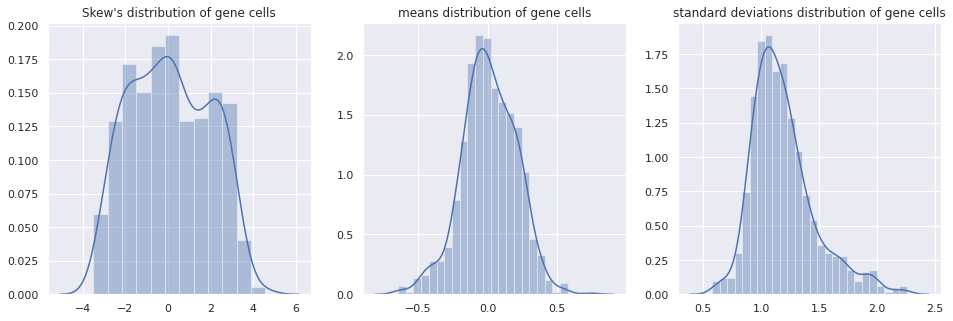

In [11]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (16,5))
sns.distplot(list_mean, ax = ax[1]) 
ax[0].set_title("Skew's distribution of gene cells")
sns.distplot(list_skew, ax = ax[0])
sns.distplot(list_std, ax = ax[2])
ax[1].set_title("means distribution of gene cells")
ax[2].set_title("standard deviations distribution of gene cells")

## Cell viablity features distributions
<span style="color:#000000; font-family: 'Georgia'; font-size: 1.1em;">
<ul>
<li>All the features of cell viability are highly skewed(>1 or < -1)</li>
<li>All skew values are negative, so all their distributions have left long tail</li>
<li>skew values distributed around -3 </li>   
<li>Some bumps at value -10</li>
<li>The means are distributed around -0.45(approx), no positive means. Probably "bumps" meantioned above shifted the means to left </li>   
 <li> The stds are distributed around 2</li>   
</ul>    
</span>

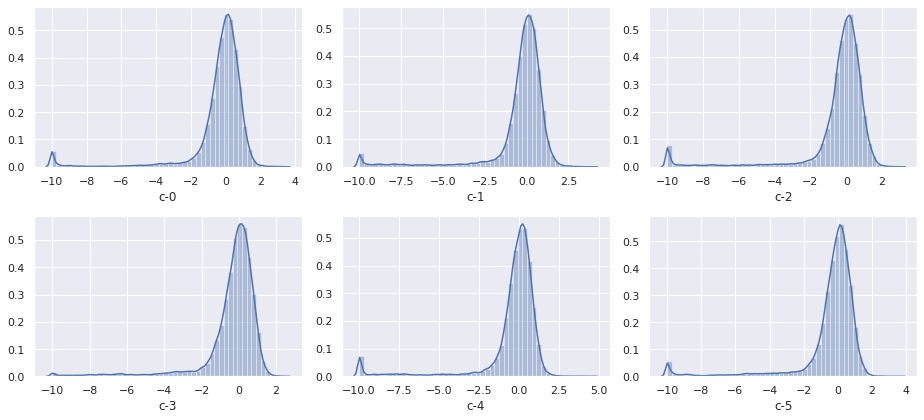

In [12]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (13,6))
sns.set(style="darkgrid")
sns.distplot(df_train['c-0'], ax = ax[0][0])
sns.distplot(df_train['c-1'], ax = ax[0][1])
sns.distplot(df_train['c-2'], ax = ax[0][2])
sns.distplot(df_train['c-3'], ax = ax[1][0])
sns.distplot(df_train['c-4'], ax = ax[1][1])
sns.distplot(df_train['c-5'], ax = ax[1][2])
plt.tight_layout()

In [14]:
num_symm = 0
num_moderate = 0
negative_skew = 0
list_mean = []
list_skew = []
list_std = []
for i in range(0, 100):
    list_mean.append(df_train[f'c-{i}'].mean())
    list_std.append(df_train[f'c-{i}'].std())
    list_skew.append(df_train[f'c-{i}'].skew())

    if df_train[f'c-{i}'].skew() < 0:
        negative_skew += 1
    if df_train[f'c-{i}'].skew() <= 0.5 and df_train[f'c-{i}'].skew() >= -0.5:
        num_symm += 1
    if df_train[f'c-{i}'].skew() <= 1 and df_train[f'c-{i}'].skew() >= 0.5 or df_train[f'c-{i}'].skew() >= -1 and df_train[f'c-{i}'].skew() <= -0.5:
        num_moderate += 1
print(f'number of negative skew: {negative_skew}')
print(f'number of cell viability classes that is almost symmetric: {num_symm}')
print(f'number of cell viability classes that is moderately skewed:{num_moderate}')
print(f'number of cell viability classes that is highly skewed: {100 - num_symm - num_moderate}')

number of negative skew: 100
number of cell viability classes that is almost symmetric: 0
number of cell viability classes that is moderately skewed:0
number of cell viability classes that is highly skewed: 100


Text(0.5, 1.0, 'standard deviations distribution of cell viability features')

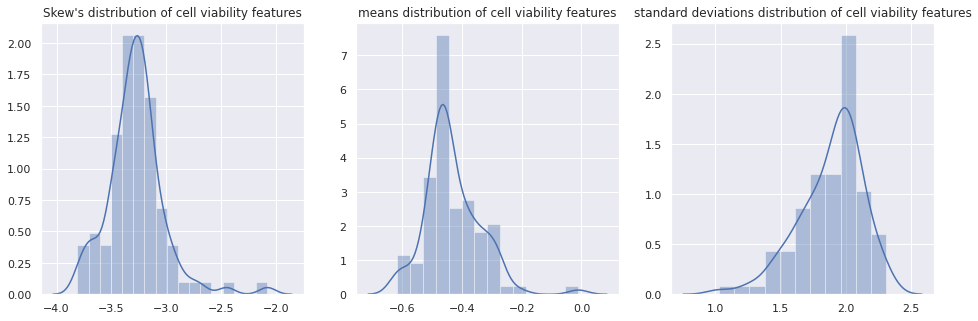

In [15]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (16,5))
sns.distplot(list_mean, ax = ax[1]) 
ax[0].set_title("Skew's distribution of cell viability features")
sns.distplot(list_skew, ax = ax[0])
sns.distplot(list_std, ax = ax[2])
ax[1].set_title("means distribution of cell viability features")
ax[2].set_title("standard deviations distribution of cell viability features")

## Target features
<span style="color:#000000; font-family: 'Georgia'; font-size: 1.1em;">
<ul>
<li>Classes erbb2_inhibitor and atp-sensitive_potassium... have smallest amount of MoA = 1  </li>
<li>nfkb inhibator class has largest number of MoA's = 832(23814 samples), so it is 3.5 % from overall number of samples. </li>
<li>88 % of classes have less(or equal) than 200 MoA's. 58 % of classes have less than 50 MoA's. Note that we have 206 classes overall </li>   
</ul>    
</span>

Text(0.5, 1.0, 'MoA count per class')

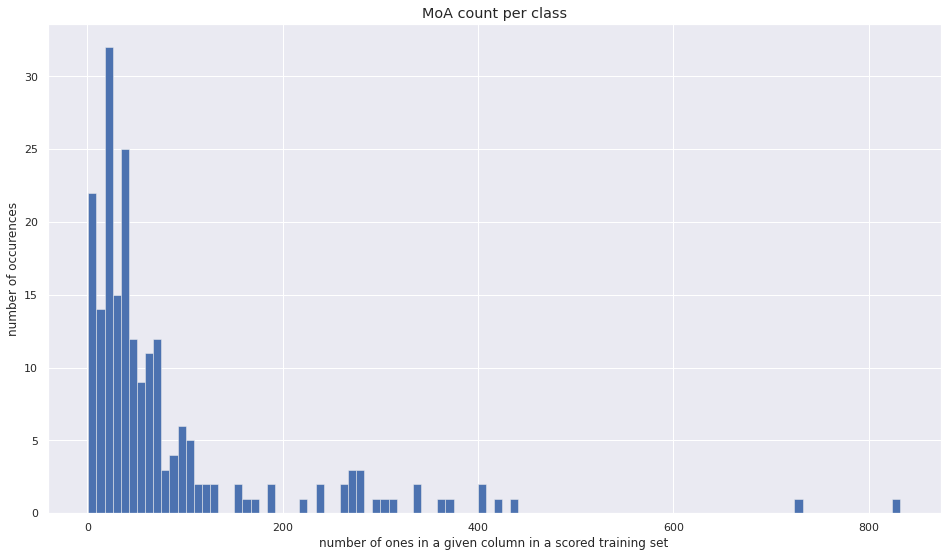

In [16]:
fig, ax = plt.subplots(figsize = (16, 9))
df_ts_without_id = df_ts.drop(columns = ['sig_id'])
sorted_scored_target = df_ts_without_id.sum(axis = 0).sort_values(ascending = False)
plt.style.use('ggplot')
sorted_scored_target.hist(ax = ax, bins = 100)
ax.set_xlabel('number of ones in a given column in a scored training set')
ax.set_ylabel('number of occurences')
ax.set_title('MoA count per class')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


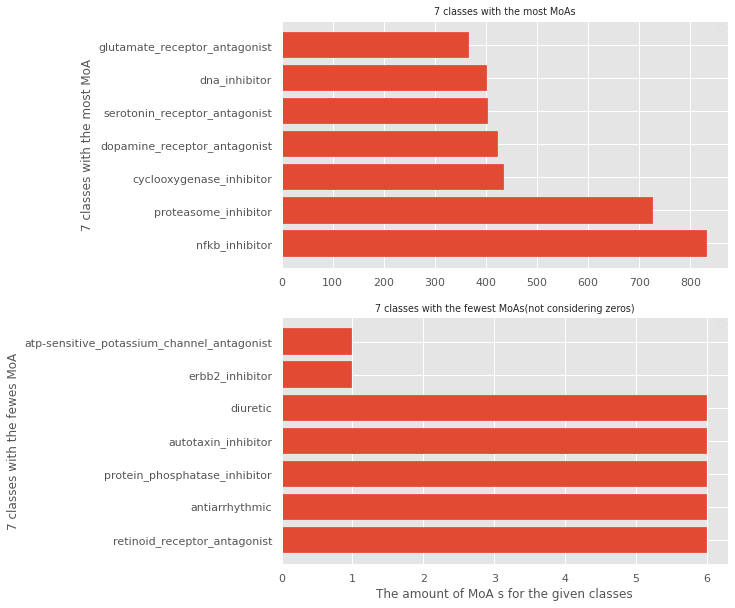

In [17]:
sort_ascend = df_ts_without_id.sum(axis = 0)
s = sort_ascend[sort_ascend > 0].sort_values()
zeros = sort_ascend[sort_ascend == 0]
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))

plt.style.use('seaborn-paper')
max7 = sorted_scored_target.head(7).index
y_pos = np.arange(len(max7))
max7_values = sorted_scored_target.head(7).values
ax[0].barh(y_pos, max7_values)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(max7)
ax[0].set_title('7 classes with the most MoAs')
ax[0].set_ylabel('7 classes with the most MoA')
#---------------------------------------------------
min7 = sorted_scored_target.tail(7).index
y_pos = np.arange(len(min7))
min7_values = sorted_scored_target.tail(7).values
ax[1].barh(y_pos, min7_values)
ax[1].set_yticks(y_pos)
ax[1].set_yticklabels(min7)
ax[1].set_title('7 classes with the fewest MoAs(not considering zeros)')
ax[1].set_ylabel('7 classes with the fewes MoA')
ax[1].set_xlabel('The amount of MoA s for the given classes')
ax[0].legend()
ax[1].legend()

In [18]:
num_moa = 200    
num_class = len(sorted_scored_target[sorted_scored_target <= num_moa])
print(f'{round(num_class*100/206)} % of classes has less than {num_moa} MoA')

88 % of classes has less than 200 MoA


### MoA annotations per sample
<span style="color:#000000; font-family: 'Georgia'; font-size: 1.1em;">
From the graph below, we see that almost 39 % of samples has no MoA annotations, and around 53% has only 1 annotations. So 92% of sampes has 1 or 0 MoA annotations and just 8% of samples has 2-7 annotations.
 </span>

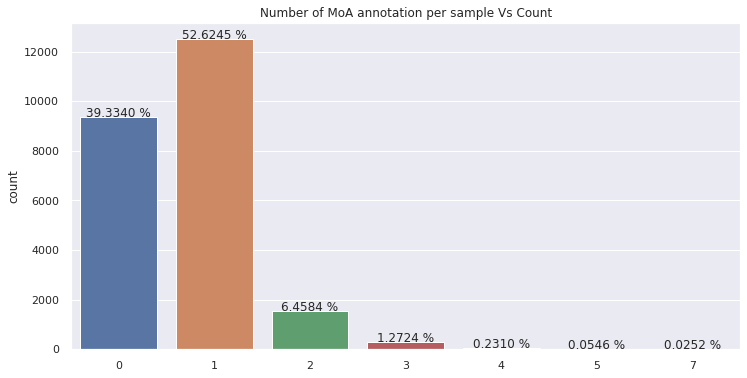

In [97]:
moa_per_sample = df_ts_without_id.sum(axis = 1).sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(moa_per_sample, ax = ax)
ax.set_title('Number of MoA annotation per sample Vs Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f} %'.format(100 * height/moa_per_sample.count()),
            ha="center") 

## Non-scored target data

In [100]:
df_tns.head()

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


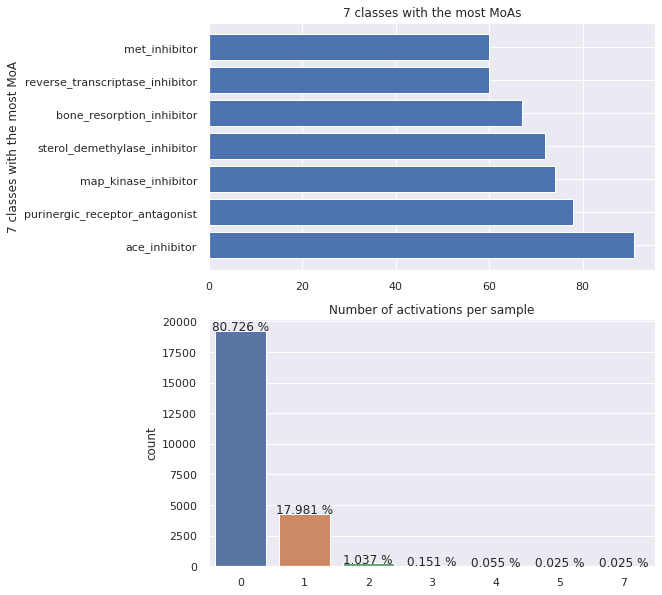

In [142]:
df_tns_noId = df_tns.drop(columns = ['sig_id'])
sorted_tns = df_tns_noId.sum(axis = 0).sort_values(ascending = False)
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))
max7 = sorted_tns.head(7).index
max7_values = sorted_tns.head(7).values
y_pos = np.arange(len(max7))
ax[0].barh(y_pos, max7_values)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(max7)
ax[0].set_title('7 classes with the most MoAs')
ax[0].set_ylabel('7 classes with the most MoA')

#---------------------------------------------------------
moa_per_samp = df_tns_noId.sum(axis = 1).sort_values(ascending = False)
ax[1].set_title('Number of activations per sample')
tr = sns.countplot(moa_per_samp, ax = ax[1])
for p in tr.patches:
    height = p.get_height()
    tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f} %'.format(100 * height/moa_per_samp.count()),
            ha="center") 
    
    

Text(0.5, 1.0, 'MoA count per class')

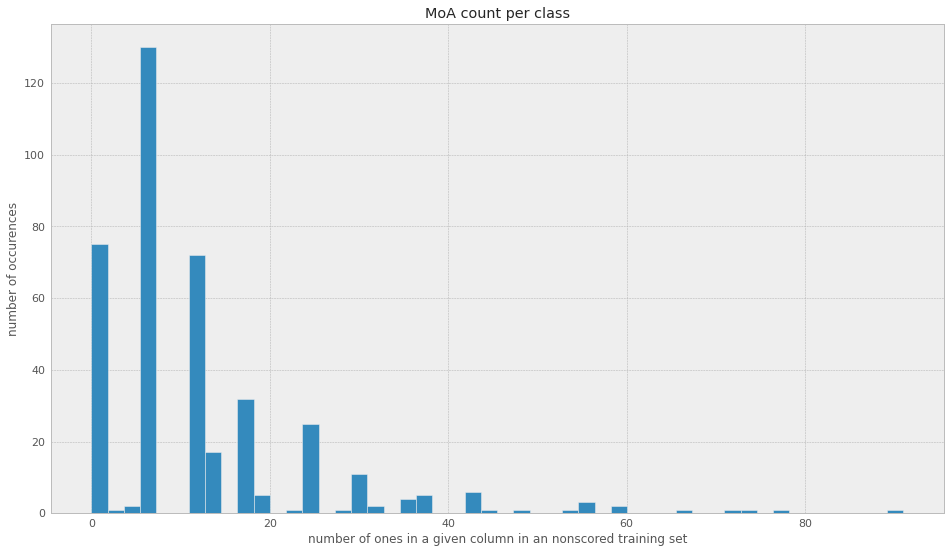

In [146]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.style.use('bmh')
sorted_tns.hist(ax = ax, bins = 50)
ax.set_xlabel('number of ones in a given column in an nonscored training set')
ax.set_ylabel('number of occurences')
ax.set_title('MoA count per class')